# Context
This data set is created only for the learning purpose of the customer concepts , also known as market basket analysis . 

# Content
You are owing a supermarket mall and through membership cards , you have some basic data about your customers like Customer ID, age, gender, annual income and spending score.
Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.

# Problem Statement
You own the mall and want to understand the customers like who can be easily converge [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly.



# Dataset:
You have a dataset containing information about customers in a supermarket mall. The dataset includes the following attributes:

Customer ID
Age
Gender
Annual Income
Spending Score



# DATA LOADING

In [4]:
# WE IMPORT THE NECESSARY LIBRARIES TO LOAD THE DATASET

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [5]:
path=r'C:\Users\user\Desktop\MICHELLE\DATA SCIENCE\Projects practices\mall_customers.csv'
df=pd.read_csv(path)
df

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]

# DATA EXPLORATION(EDA)

In [7]:
df.shape


(200, 5)

This explains that the dataset has 200 rows and 5 columns.

In [8]:
df.describe(include='all')

CustomerID  Gender         Age  Annual Income (k$)  \
count   200.000000     200  200.000000          200.000000   
unique         NaN       2         NaN                 NaN   
top            NaN  Female         NaN                 NaN   
freq           NaN     112         NaN                 NaN   
mean    100.500000     NaN   38.850000           60.560000   
std      57.879185     NaN   13.969007           26.264721   
min       1.000000     NaN   18.000000           15.000000   
25%      50.750000     NaN   28.750000           41.500000   
50%     100.500000     NaN   36.000000           61.500000   
75%     150.250000     NaN   49.000000           78.000000   
max     200.000000     NaN   70.000000          137.000000   

        Spending Score (1-100)  
count               200.000000  
unique                     NaN  
top                        NaN  
freq                       NaN  
mean                 50.200000  
std                  25.823522  
min                   1.000000  
25%                  34.750000  
50%                  50.000000  
75%                  73.000000  
max                  99.000000

On this information:
1. There are two unique values on Gender i.e Male and Female. 
2. Average age of a customer is 38, while the minimum being 18 and maximum being 70.
3. Average annual Income in Thousand Dollars for a customer is 60.56, minimum of 15 and maximum of 137.
4. Average Spending score is 50.2, minimum of 1 and maximum 99.

In [61]:
df.describe()

Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000          200.000000              200.000000
mean    38.850000           60.560000               50.200000
std     13.969007           26.264721               25.823522
min     18.000000           15.000000                1.000000
25%     28.750000           41.500000               34.750000
50%     36.000000           61.500000               50.000000
75%     49.000000           78.000000               73.000000
max     70.000000          137.000000               99.000000

In [10]:
df.columns


Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [11]:
df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

It seems that females shop a lot in this mall, having the highest number than the male.

In [6]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [17]:
df.duplicated().count()

200

In [57]:
df.corr()

Age  Annual Income (k$)  Spending Score (1-100)
Age                     1.000000           -0.012398               -0.327227
Annual Income (k$)     -0.012398            1.000000                0.009903
Spending Score (1-100) -0.327227            0.009903                1.000000

In [21]:
df.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

In [24]:
x=df.groupby('Gender').agg('count').reset_index()
x

Gender  CustomerID  Age  Annual Income (k$)  Spending Score (1-100)
0  Female         112  112                 112                     112
1    Male          88   88                  88                      88

# Visualizations

array([[<Axes: title={'center': 'CustomerID'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Annual Income (k$)'}>,
        <Axes: title={'center': 'Spending Score (1-100)'}>]], dtype=object)

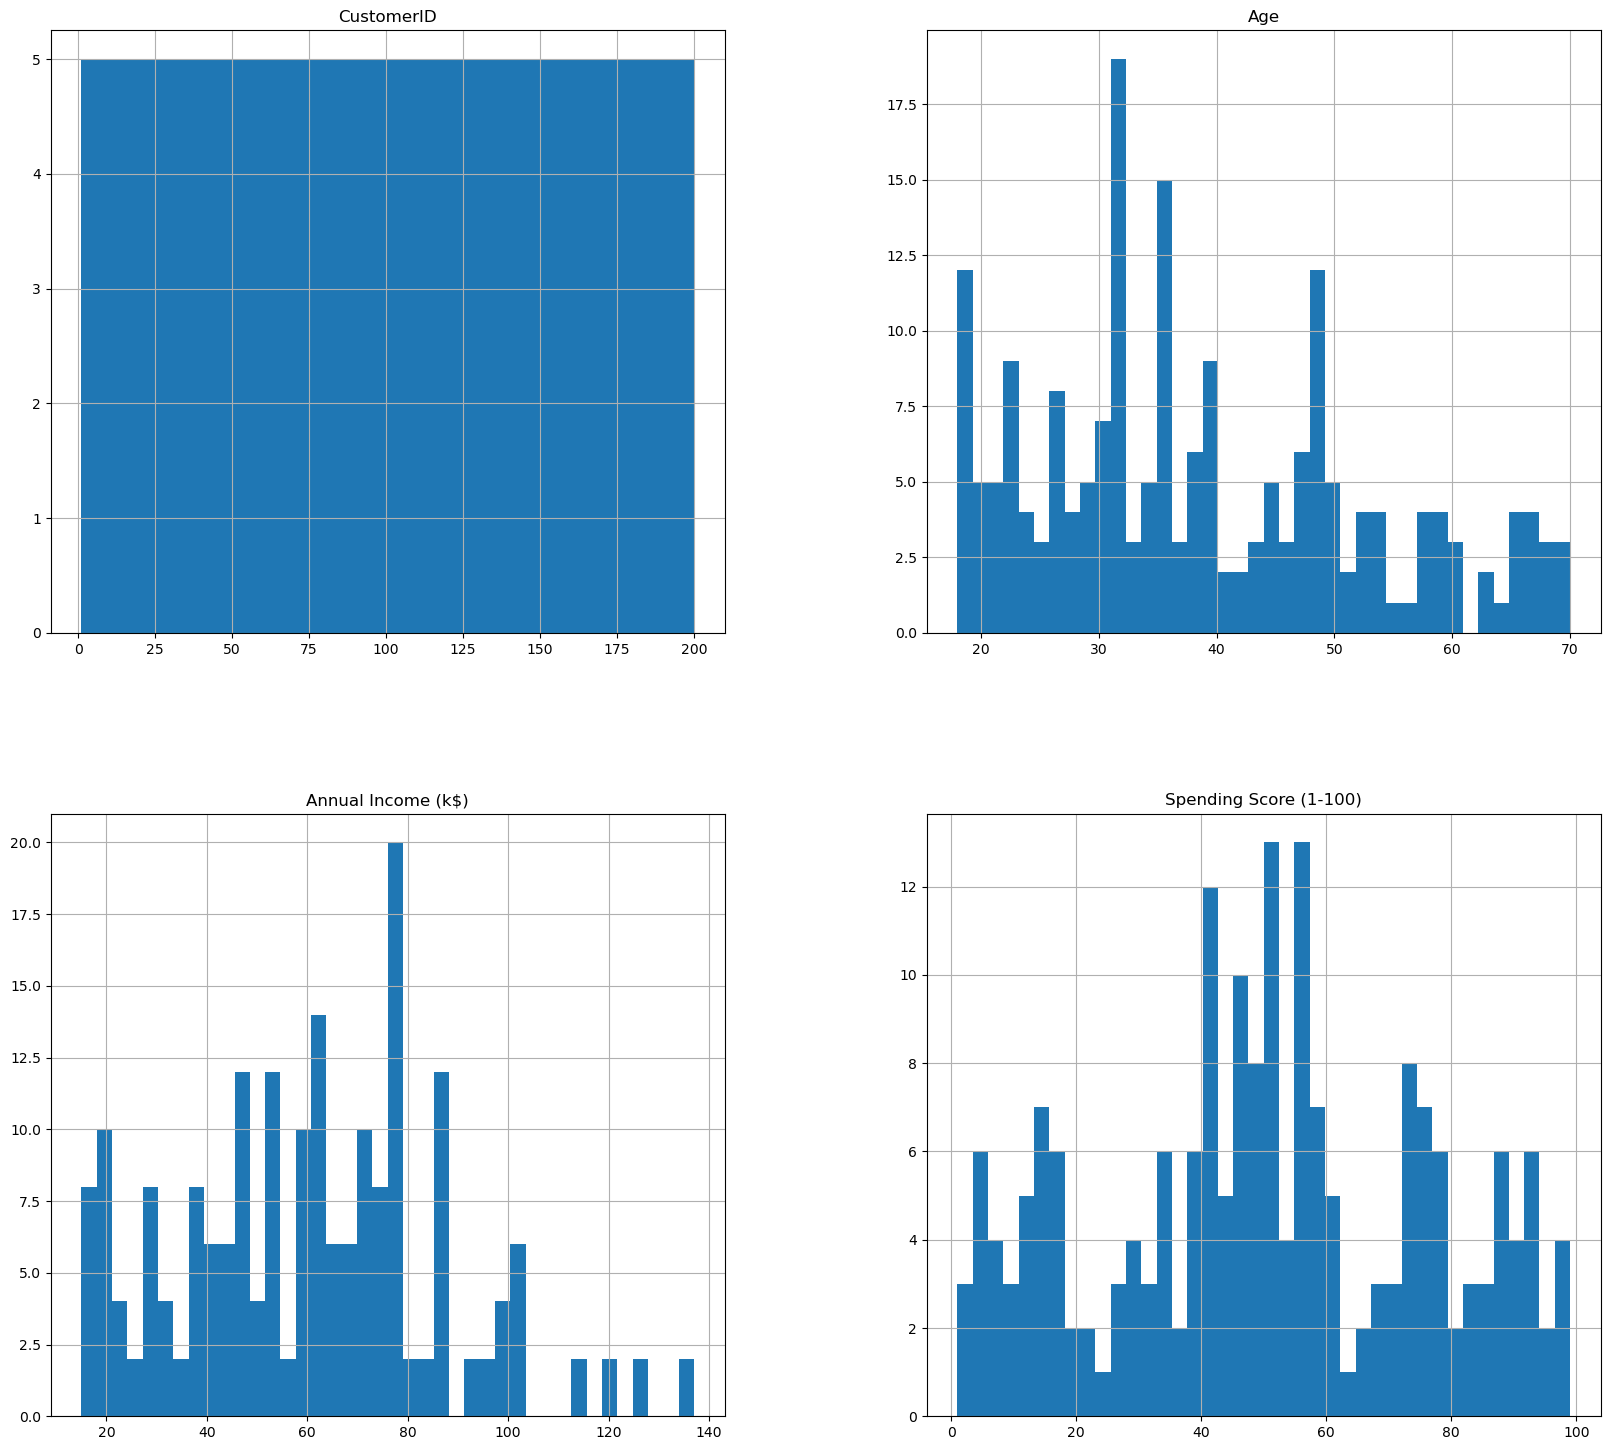

In [27]:
df.hist(bins=40, figsize=(20,18))

C:\Users\user\AppData\Local\Temp\ipykernel_4468\894878563.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), linewidth=0.6, annot=True, linecolor='black', cmap='jet')


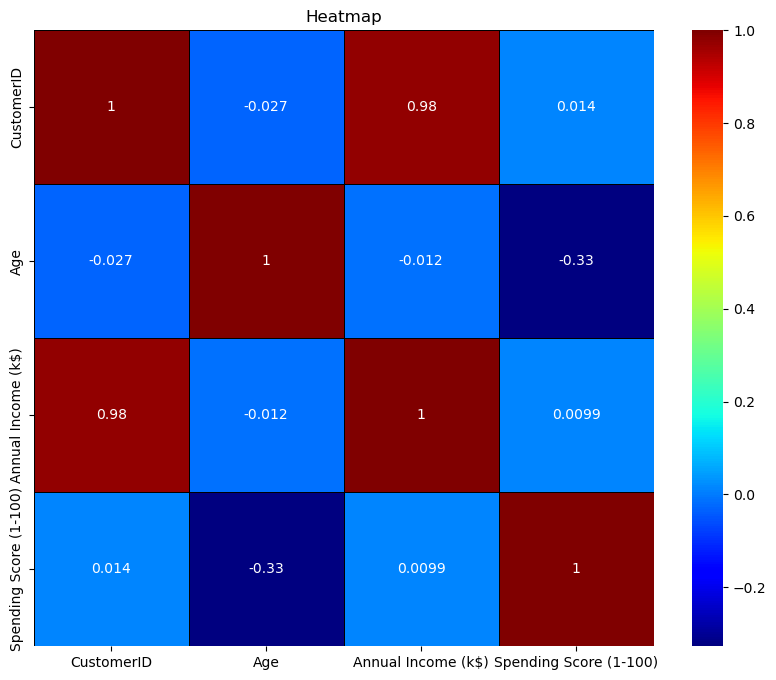

In [28]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), linewidth=0.6, annot=True, linecolor='black', cmap='jet')
plt.axis('tight')
plt.title('Heatmap')
plt.show()

You can see from the above plot that the only variables that are even somewhat correlated is spending score and age. It’s a negative correlation so the older a customer is in this data set, the lower their spending score. But because it’s 0.33, it’s not a strong correlation at all. It’s still ever so slightly informative and follows basic logic.

<Axes: xlabel='Age', ylabel='count'>

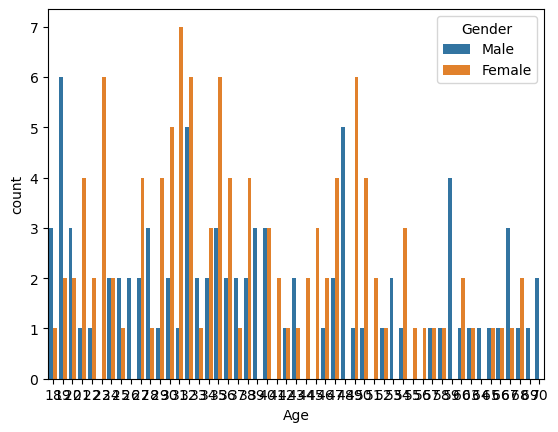

In [30]:

sns.countplot(x='Age', hue='Gender', data=df)

<Axes: xlabel='Gender', ylabel='count'>

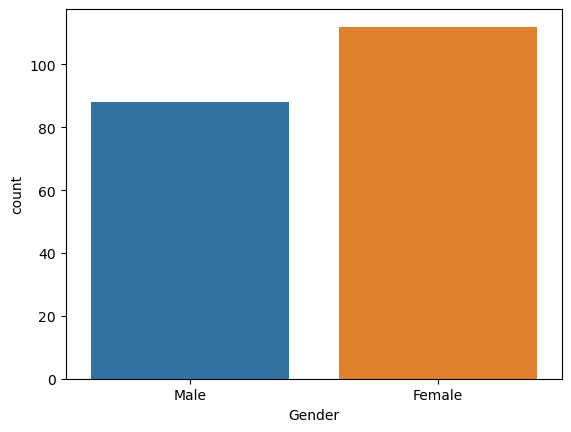

In [31]:
sns.countplot(x='Gender', data=df)

This histogram shows the distribution by gender, and in conclusion Female shop more than the male.

In [32]:
# Encoding the Gender variable since it is a categorical variable
df_encoded = pd.get_dummies(df, columns=["Gender"], drop_first=True)

# Display the resulting DataFrame
print(df_encoded.head())

#In the above code, the get_dummies() function is used to perform one-hot encoding on the "Gender" column. The drop_first=True parameter drops the first encoded column to avoid multicollinearity (one column can be inferred from the others).

#The resulting DataFrame df_encoded will have the "Gender" column encoded as binary columns ("Gender_Male" in this case):





   CustomerID  Age  Annual Income (k$)  Spending Score (1-100)  Gender_Male
0           1   19                  15                      39            1
1           2   21                  15                      81            1
2           3   20                  16                       6            0
3           4   23                  16                      77            0
4           5   31                  17                      40            0


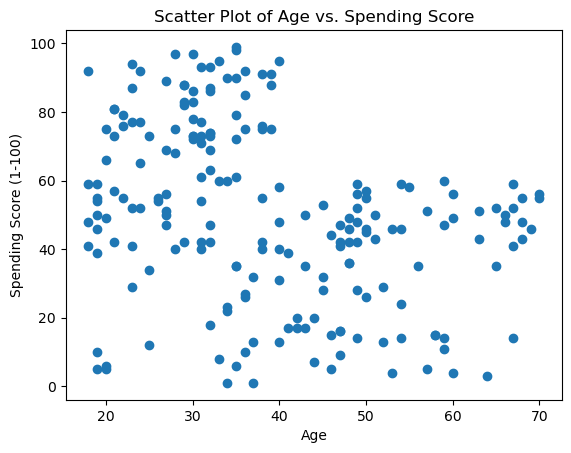

In [36]:
plt.scatter(df['Age'], df['Spending Score (1-100)'])
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.title('Scatter Plot of Age vs. Spending Score')
plt.show()

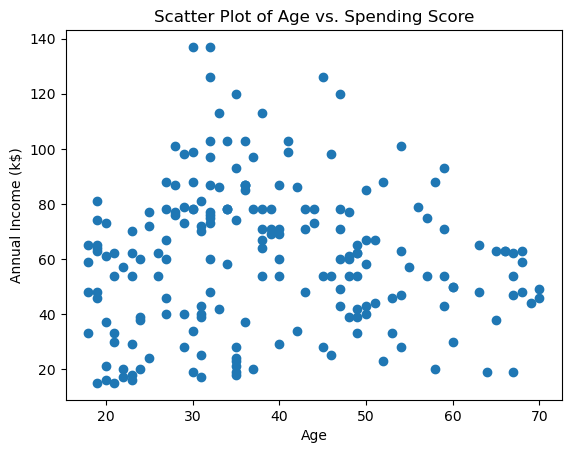

In [37]:
plt.scatter(df['Age'], df['Annual Income (k$)'])
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.title('Scatter Plot of Age vs. Spending Score')
plt.show()

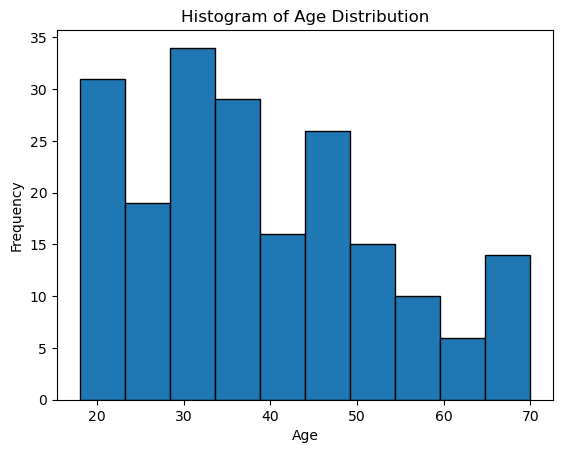

In [38]:
plt.hist(df['Age'], bins=10, edgecolor='black')  # Adjust the number of bins as needed
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age Distribution')
plt.show()

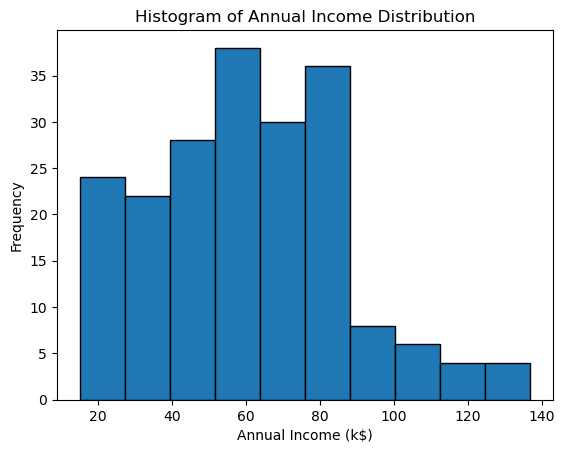

In [39]:
plt.hist(df['Annual Income (k$)'], bins=10, edgecolor='black')  # Adjust the number of bins as needed
plt.xlabel('Annual Income (k$)')
plt.ylabel('Frequency')
plt.title('Histogram of Annual Income Distribution')
plt.show()

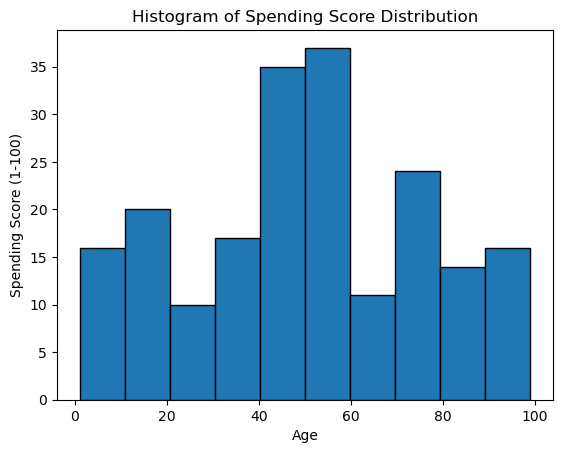

In [40]:
plt.hist(df['Spending Score (1-100)'], bins=10, edgecolor='black')  # Adjust the number of bins as needed
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.title('Histogram of Spending Score Distribution')
plt.show()

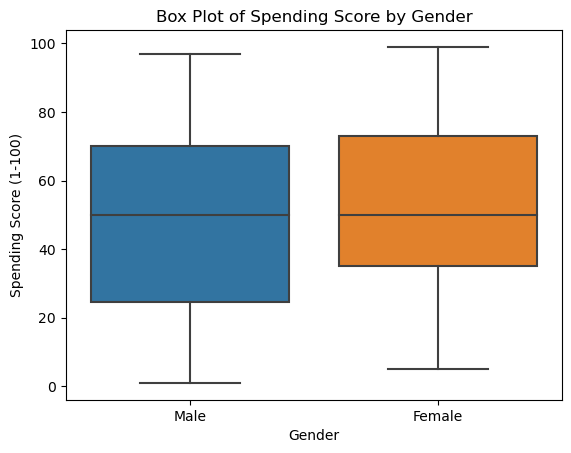

In [42]:
sns.boxplot(x='Gender', y='Spending Score (1-100)', data=df)
plt.xlabel('Gender')
plt.ylabel('Spending Score (1-100)')
plt.title('Box Plot of Spending Score by Gender')
plt.show()

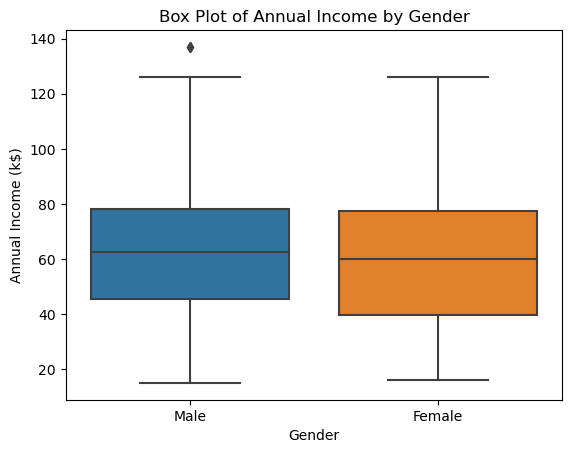

In [47]:
sns.boxplot(x='Gender', y='Annual Income (k$)', data=df)
plt.xlabel('Gender')
plt.ylabel('Annual Income (k$)')
plt.title('Box Plot of Annual Income by Gender')
plt.show()

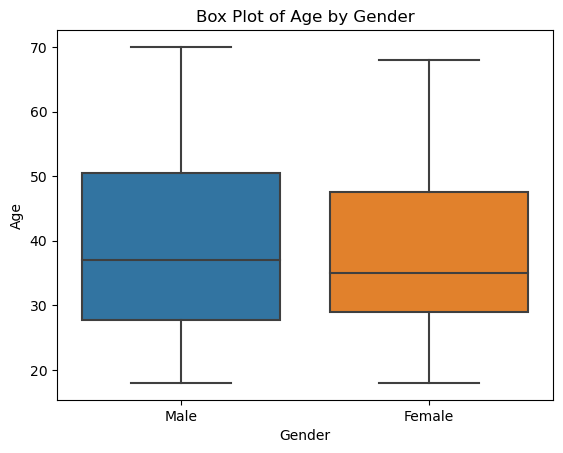

In [48]:
sns.boxplot(x='Gender', y='Age', data=df)
plt.xlabel('Gender')
plt.ylabel('Age')
plt.title('Box Plot of Age by Gender')
plt.show()

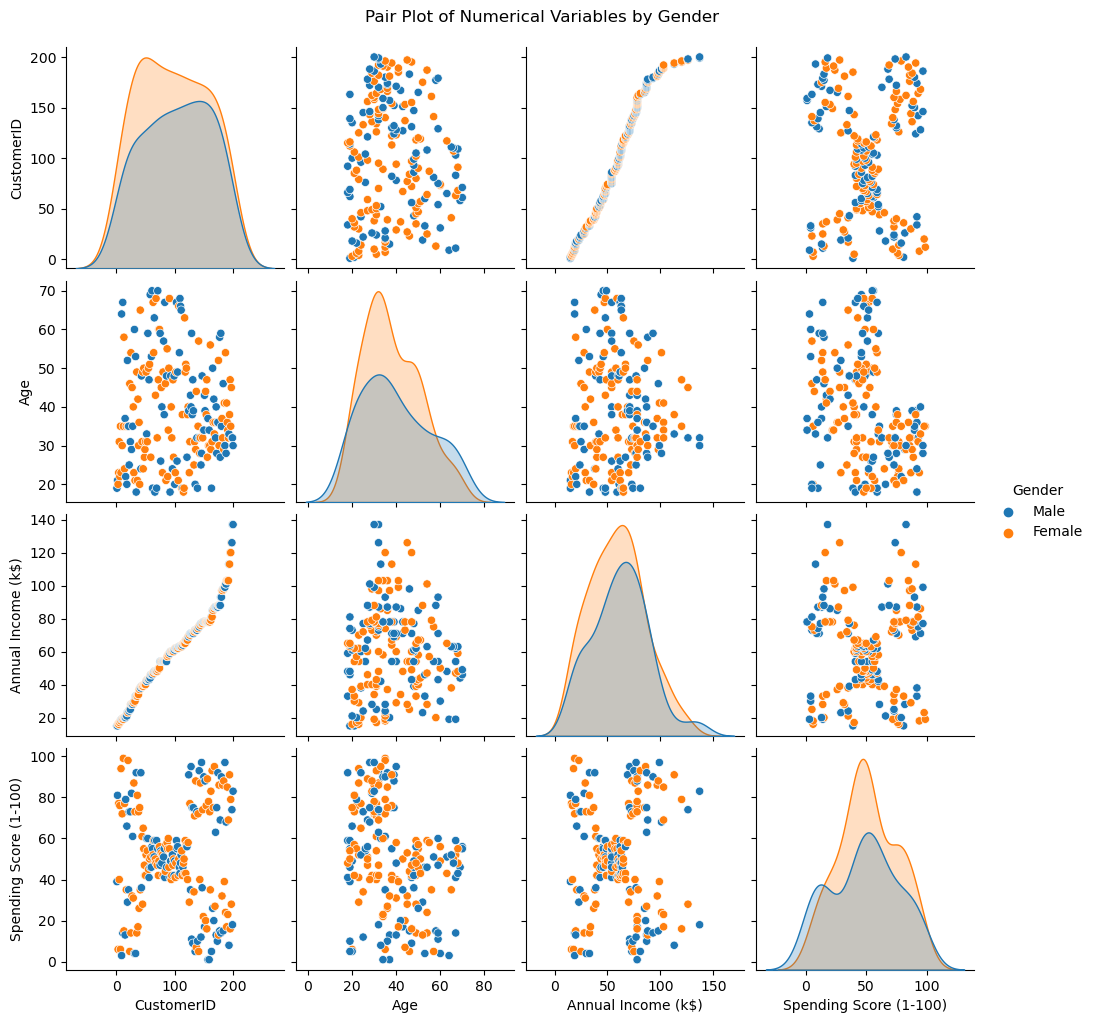

In [43]:
sns.pairplot(df, hue='Gender')
plt.suptitle('Pair Plot of Numerical Variables by Gender', y=1.02)
plt.show()

Text(0.5, 1.0, 'Age to Spending Score, Colored by Gender')

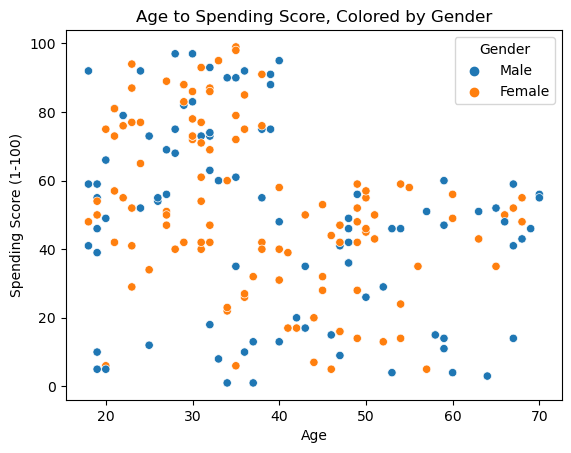

In [7]:
sns.scatterplot(x='Age',y= 'Spending Score (1-100)', hue='Gender', data=df)
plt.title('Age to Spending Score, Colored by Gender')

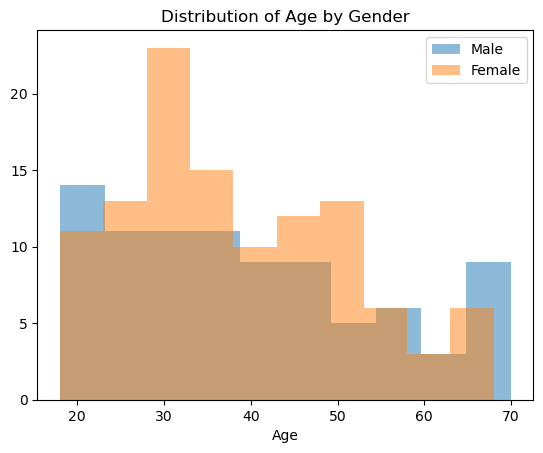

In [8]:
plt.hist('Age', data=df[df['Gender'] == 'Male'], alpha=0.5, label='Male')
plt.hist('Age', data=df[df['Gender'] == 'Female'], alpha=0.5, label='Female')
plt.title('Distribution of Age by Gender')
plt.xlabel('Age')
plt.legend()
plt.show()

Text(0.5, 0, 'Thousands of Dollars')

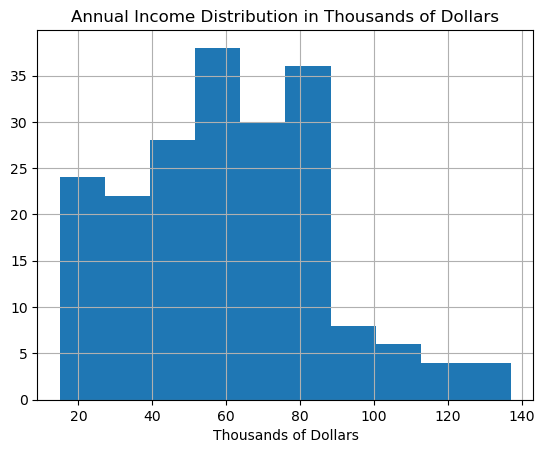

In [9]:
df.hist('Annual Income (k$)')
plt.title('Annual Income Distribution in Thousands of Dollars')
plt.xlabel('Thousands of Dollars')

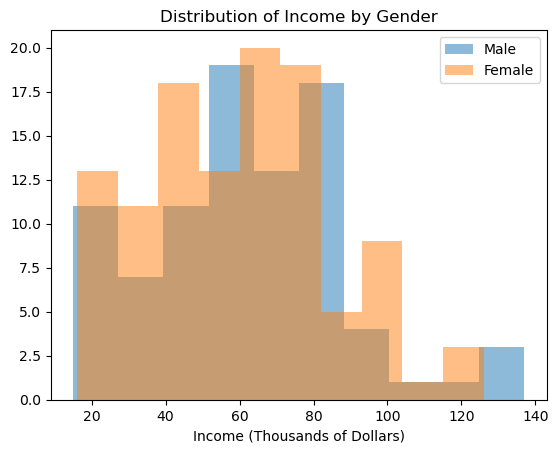

In [10]:
# Histogram of income by gender
plt.hist('Annual Income (k$)', data=df[df['Gender'] == 'Male'], alpha=0.5, label='Male')
plt.hist('Annual Income (k$)', data=df[df['Gender'] == 'Female'], alpha=0.5, label='Female')
plt.title('Distribution of Income by Gender')
plt.xlabel('Income (Thousands of Dollars)')
plt.legend();

In [11]:
# Create data sets by gender to save time in the future since gender seems to significantly impact other variables
male_customers = df[df['Gender'] == 'Male']
female_customers = df[df['Gender'] == 'Female']

# Print the average spending score for men and women
print(male_customers['Spending Score (1-100)'].mean())
print(female_customers['Spending Score (1-100)'].mean())

48.51136363636363
51.526785714285715


Text(0.5, 1.0, 'Age to Income, Colored by Gender')

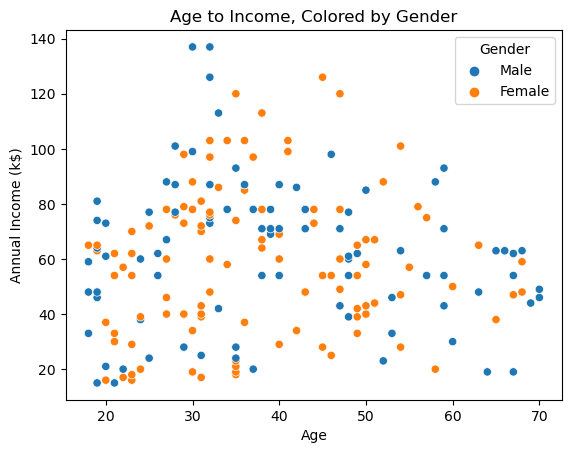

In [12]:
sns.scatterplot(x='Age', y='Annual Income (k$)', hue='Gender', data=df)
plt.title('Age to Income, Colored by Gender')

Text(0.5, 1.0, 'Age to Spending Score')

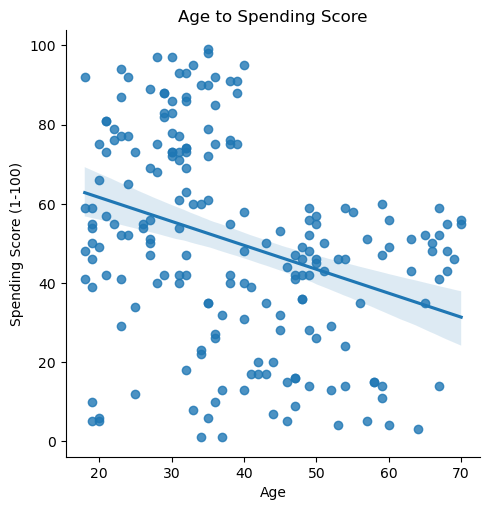

In [13]:
sns.lmplot(x='Age',y= 'Spending Score (1-100)', data=df)
plt.title('Age to Spending Score')

Text(0.5, 1.0, 'Annual Income to Spending Score, Colored by Gender')

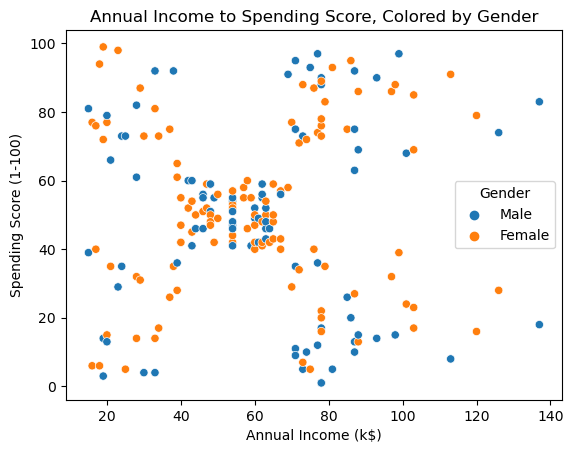

In [14]:
sns.scatterplot(x='Annual Income (k$)',y= 'Spending Score (1-100)', hue='Gender', data=df)
plt.title('Annual Income to Spending Score, Colored by Gender')

Text(0.5, 1.0, 'Distribution of Customers age')

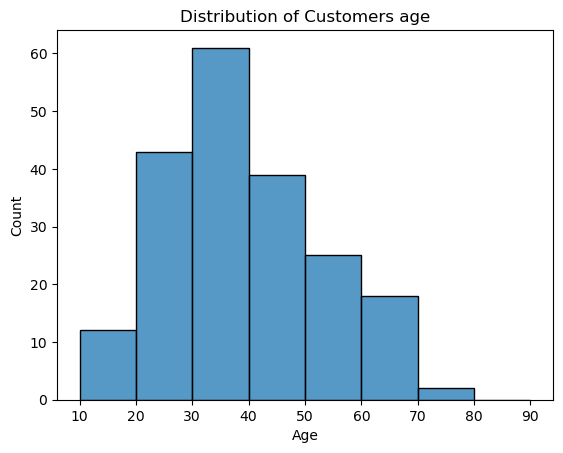

In [17]:
sns.histplot(data=df, x='Age', bins=list(range(10,100,10)))
plt.title('Distribution of Customers age')

This shows that most of our customers are aged from 30-40 years.

In [18]:
import plotly.express as px

In [20]:
fig=px.scatter(df, x='Annual Income (k$)', y='Spending Score (1-100)', title='Relationship between Income and Spending Score', height=500,
              color_discrete_sequence=px.colors.qualitative.G10[1:])
fig.show()

In [21]:
fig=px.scatter(df, x='Annual Income (k$)', y='Spending Score (1-100)', title='Relationship between Income vs Spending Score on Gender', color='Gender', height=500)
fig.show()